In [29]:
import pandas as pd

# Charger le dataset
data = pd.read_csv('dataset_updated.csv')

# Afficher les premières lignes
print(data.head())


     Prix  Annee  Auto_manuel Carburant      Marque             Module  \
0  320000   2022  Automatique    Diesel  Volkswagen             Tiguan   
1  345000   2014  Automatique    Diesel  Land Rover  Range Rover Sport   
2  159000   2021  Automatique    Diesel       Dacia             Duster   
3  206000   2021  Automatique   Hybride      Toyota            Corolla   
4  206000   2023     Manuelle    Diesel        Jeep           Renegade   

   Nombre de portes Première main       Etat  Kilometrage  Puissance_fiscale  
0                 5           Oui  Excellent       104999                  8  
1                 5           Oui  Excellent       164999                 12  
2                 5           Non   Très bon        97499                  6  
3                 5           Oui  Excellent        62499                  9  
4                 5           Oui  Excellent        52499                  6  


In [30]:

# Afficher les noms des colonnes du DataFrame
print("Colonnes du dataset :")
print(data.columns)



Colonnes du dataset :
Index(['Prix', 'Annee', 'Auto_manuel', 'Carburant', 'Marque', 'Module',
       'Nombre de portes', 'Première main', 'Etat', 'Kilometrage',
       'Puissance_fiscale'],
      dtype='object')


In [34]:
data.dtypes

Prix                  int64
Annee                 int64
Auto_manuel          object
Carburant            object
Marque               object
Module               object
Nombre de portes      int64
Première main        object
Etat                 object
Kilometrage           int64
Puissance_fiscale     int64
dtype: object

In [35]:
# Vérifier les valeurs manquantes dans chaque colonne
valeurs_manquantes = data.isnull().sum()
print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
Prix                 0
Annee                0
Auto_manuel          0
Carburant            0
Marque               0
Module               0
Nombre de portes     0
Première main        0
Etat                 0
Kilometrage          0
Puissance_fiscale    0
dtype: int64


In [31]:
# Afficher les valeurs uniques dans la colonne 'Carburant'
valeurs_uniques = data['Carburant'].unique()
print("Valeurs dans la colonne 'Carburant' :")
print(valeurs_uniques)


Valeurs dans la colonne 'Carburant' :
['Diesel' 'Hybride' 'Essence' 'Electrique' 'LPG' 'diesel']


In [38]:
# Identifier les valeurs doublons pour chaque colonne
for colonne in data.columns:
    doublons = data[colonne][data[colonne].duplicated()]
    if not doublons.empty:
        print(f"Doublons trouvés dans la colonne '{colonne}' :")
        print(doublons.unique())
        print("-" * 50)


Doublons trouvés dans la colonne 'Prix' :
[ 206000  145000  150000  109000  120000  193000  105000  159000  148000
  280000   75000  143000   45000  215000  205000  118000  225000  320000
  140000   55000  390000   83000  163000  250000  335000  155000  240000
  248000  135000  170000  119000   58000  279000   99000  330000  263000
  169000  165000  210000  149000  173000  115000  179000  315000  295000
  255000  269000  186000  187000  157000  229000  220000  256000  189000
  326000  239000  158000  175000  234000  174000  194000  139000  260000
  185000  162000   39000   38000  146000   95000  132000  238000  128000
   98000  142000   28000  360000  298000  230000  138000  176000  259000
  350000  460000  235000  117000  370000  345000  153000  650000  380000
  122000  188000   88000  129000  310000  340000  410000   79000  147000
  420000  290000  180000  490000  400000  245000  395000  430000  285000
  108000  500000  530000  200000  288000  182000  190000   76000  305000
  110000 

In [37]:
# Trouver les colonnes doublons dans le DataFrame
doublons_colonnes = data.columns[data.columns.duplicated()].unique()

print("Colonnes en doublon :")
print(doublons_colonnes)


Colonnes en doublon :
Index([], dtype='object')


In [66]:
data = pd.read_csv("dataset_updated.csv")
prix_min = data["Prix"].min()
prix_max = data["Prix"].max()
print(f"Prix minimum : {prix_min}")
print(f"Prix maximum : {prix_max}")

Prix minimum : 42
Prix maximum : 13500000


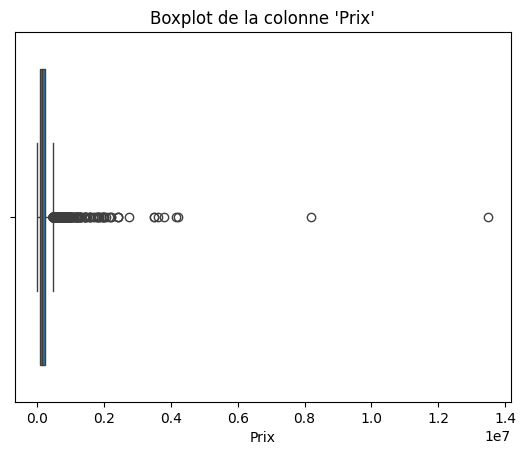

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot pour la colonne 'Prix' avec Seaborn
sns.boxplot(x=data['Prix'])

# Ajouter un titre
plt.title("Boxplot de la colonne 'Prix'")

# Afficher le graphique
plt.show()


In [63]:
import pandas as pd

# Charger les données
data = pd.read_csv("dataset_updated.csv")

# Définir la colonne à analyser
column = "Prix"

# Calculer les quartiles et l'IQR
Q1 = data[column].quantile(0.25)  # Premier quartile
Q3 = data[column].quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1  # Intervalle interquartile

# Calculer les bornes inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Afficher les bornes
print(f"Borne inférieure : {lower_bound}")
print(f"Borne supérieure : {upper_bound}")

# Filtrer les valeurs aberrantes inférieures
outliers_inf = data[data[column] < lower_bound]
# Filtrer les valeurs aberrantes supérieures
outliers_sup = data[data[column] > upper_bound]

# Afficher le nombre de valeurs aberrantes
print(f"Nombre de valeurs aberrantes inférieures : {len(outliers_inf)}")
print(f"Nombre de valeurs aberrantes supérieures : {len(outliers_sup)}")
print(f"Total des valeurs aberrantes : {len(outliers_inf) + len(outliers_sup)}")







Borne inférieure : -135000.0
Borne supérieure : 465000.0
Nombre de valeurs aberrantes inférieures : 0
Nombre de valeurs aberrantes supérieures : 628
Total des valeurs aberrantes : 628


 notre analyse vise les véhicules accessibles au grand public ou une gamme de prix spécifique (par exemple, véhicules abordables), alors ces valeurs pourraient être exclues.

Supprimer les valeurs supérieures à 450,000 permet de concentrer votre étude sur un segment précis du marché.

In [9]:
import pandas as pd

# Charger les données
data = pd.read_csv("AvitoVoitures_Clean.csv")

# Supprimer les lignes où "Prix" < 10000
data_cleaned = data[data["Prix"] >= 10000]

# Vérifier le dataset nettoyé
print("Dataset après suppression des prix inférieurs à 10,000 :")
print(data_cleaned.head())

# Enregistrer le dataset nettoyé dans un nouveau fichier CSV
data_cleaned.to_csv("AvitoVoitures_net.csv", index=False)
print("Le fichier nettoyé a été enregistré sous le nom 'AvitoVoitures_PrixSup10000.csv'.")



Dataset après suppression des prix inférieurs à 10,000 :
     Prix  Annee  Auto_manuel Carburant      Marque             Module  \
0  320000   2022  Automatique    diesel  Volkswagen             Tiguan   
1  345000   2014  Automatique    diesel  Land Rover  Range Rover Sport   
2  159000   2021  Automatique    diesel       Dacia             Duster   
3  206000   2021  Automatique   hybride      Toyota            Corolla   
4  206000   2023     Manuelle    diesel        Jeep           Renegade   

   Nombre de portes Première main       Etat  Kilometrage  Puissance_fiscale  
0                 5           Oui  Excellent       104999                  8  
1                 5           Oui  Excellent       164999                 12  
2                 5           Non   Très bon        97499                  6  
3                 5           Oui  Excellent        62499                  9  
4                 5           Oui  Excellent        52499                  6  
Le fichier nettoyé a été

In [71]:
# Afficher le nombre de lignes restantes dans le DataFrame
print(f"Nombre de lignes restantes dans le DataFrame : {len(data_cleaned)}")


Nombre de lignes restantes dans le DataFrame : 12875


# Encoding

In [3]:
import pandas as pd

# Charger votre dataset
data = pd.read_csv("AvitoVoitures_net.csv")

# Définir les colonnes catégoriques à encoder
colonnes_categoriques = ['Auto_manuel', 'Carburant', 'Marque', 'Module', 'Première main', 'Etat']

# Appliquer One-Hot Encoding avec pandas
data_encoded = pd.get_dummies(data, columns=colonnes_categoriques, drop_first=False)

# Convertir explicitement les colonnes en entier (0 et 1 si nécessaire)
data_encoded = data_encoded.astype(int)

# Afficher les premières lignes du dataset encodé
print("Dataset après One-Hot Encoding :")
print(data_encoded.head())



Dataset après One-Hot Encoding :
     Prix  Annee  Nombre de portes  Kilometrage  Puissance_fiscale  \
0  320000   2022                 5       104999                  8   
1  345000   2014                 5       164999                 12   
2  159000   2021                 5        97499                  6   
3  206000   2021                 5        62499                  9   
4  206000   2023                 5        52499                  6   

   Auto_manuel_Automatique  Auto_manuel_Manuelle  Carburant_diesel  \
0                        1                     0                 1   
1                        1                     0                 1   
2                        1                     0                 1   
3                        1                     0                 0   
4                        0                     1                 1   

   Carburant_electrique  Carburant_essence  ...  Module_iX3  Module_ix35  \
0                     0                  0  ...  

One-Hot Encoding :

Transforme chaque catégorie en une colonne distincte avec des valeurs binaires.

Utile pour les algorithmes sensibles aux relations ordinales, comme la régression linéaire.

In [73]:
data_encoded.shape

(12875, 608)

# Normalisation

In [ ]:
from scipy.stats import shapiro

# Test de normalité sur la colonne 'Kilometrage'
stat, p = shapiro(data_encoded['Prix'])
print(f"Statistique du test = {stat}, p-value = {p}")
if p > 0.05:
    print("La distribution de 'Prix' est normale (on ne rejette pas H0)")
else:
    print("La distribution de 'Prix' n'est pas normale (on rejette H0)")


Statistique du test = 0.9385302239355733, p-value = 5.6293748578409184e-58
La distribution de 'Kilometrage' n'est pas normale (on rejette H0)


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12875.
  res = hypotest_fun_out(*samples, **kwds)


In [4]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd



# Colonnes à normaliser
colonnes_a_normaliser = ['Prix', 'Annee', 'Nombre de portes', 'Kilometrage', 'Puissance_fiscale']

# Appliquer la normalisation Min-Max
scaler = MinMaxScaler()
data_encoded[colonnes_a_normaliser] = scaler.fit_transform(data_encoded[colonnes_a_normaliser])

# Afficher un aperçu des données normalisées
print("Dataset après Min-Max Scaling :")
print(data_encoded.head())

# Enregistrer le DataFrame normalisé dans un fichier CSV
data_encoded.to_csv("AvitoVoitures_normalise.csv", index=False)  # Sauvegarde sans l'index
print("Le fichier normalisé a été enregistré sous le nom 'AvitoVoitures_normalises.csv'.")


Dataset après Min-Max Scaling :
       Prix     Annee  Nombre de portes  Kilometrage  Puissance_fiscale  \
0  0.681319  0.933333               1.0     0.206030           0.108108   
1  0.736264  0.755556               1.0     0.326633           0.216216   
2  0.327473  0.911111               1.0     0.190954           0.054054   
3  0.430769  0.911111               1.0     0.120603           0.135135   
4  0.430769  0.955556               1.0     0.100502           0.054054   

   Auto_manuel_Automatique  Auto_manuel_Manuelle  Carburant_diesel  \
0                        1                     0                 1   
1                        1                     0                 1   
2                        1                     0                 1   
3                        1                     0                 0   
4                        0                     1                 1   

   Carburant_electrique  Carburant_essence  ...  Module_iX3  Module_ix35  \
0                   

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd



# Colonnes à normaliser
colonnes_a_normaliser = ['Prix', 'Annee', 'Nombre de portes', 'Kilometrage', 'Puissance_fiscale']

# Appliquer la normalisation Min-Max
scaler = MinMaxScaler()
data_encoded[colonnes_a_normaliser] = scaler.fit_transform(data_encoded[colonnes_a_normaliser])

# Afficher un aperçu des données normalisées
print("Dataset après Min-Max Scaling :")
print(data_encoded.head())

# Enregistrer le DataFrame normalisé dans un fichier CSV
data_encoded.to_csv("AvitoVoitures_normalise.csv", index=False)  # Sauvegarde sans l'index
print("Le fichier normalisé a été enregistré sous le nom 'AvitoVoitures_normalises.csv'.")


In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 📥 Charger le dataset
data = pd.read_csv("AvitoVoitures_net.csv")

# 🔹 Définir les colonnes catégoriques à encoder
colonnes_categoriques = ['Auto_manuel', 'Carburant', 'Marque', 'Module', 'Première main', 'Etat']

# 🔹 Encodage des variables catégoriques (One-Hot Encoding)
data_encoded = pd.get_dummies(data, columns=colonnes_categoriques, drop_first=False)

# 🔹 Convertir les colonnes booléennes en entiers (1 et 0)
data_encoded = data_encoded.astype(int)

# 🔹 Séparer la colonne "Prix" avant la normalisation
prix_original = data_encoded["Prix"]

# 🔹 Définir les colonnes numériques à normaliser (exclure "Prix")
colonnes_a_normaliser = ['Annee', 'Nombre de portes', 'Kilometrage', 'Puissance_fiscale']

# ⚙️ Appliquer MinMaxScaler sur les caractéristiques numériques uniquement
scaler = MinMaxScaler()
data_encoded[colonnes_a_normaliser] = scaler.fit_transform(data_encoded[colonnes_a_normaliser])

# 🔹 Réintégrer les prix non normalisés
data_encoded["Prix"] = prix_original

# 📤 Sauvegarder le dataset encodé et normalisé
data_encoded.to_csv("AvitoVoitures_Normalise2.csv", index=False)

print("✔️ Le dataset encodé et normalisé avec 1 et 0 a été enregistré sous 'AvitoVoitures_Normalise2.csv'.")


✔️ Le dataset encodé et normalisé avec 1 et 0 a été enregistré sous 'AvitoVoitures_Normalise2.csv'.


In [12]:
data_encoded.shape

(12875, 608)

Etape 2 : Analyse Exploratoire des Données (EDA)

In [77]:

prix_min = data["Prix"].min()
prix_max = data["Prix"].max()
print(f"Prix minimum : {prix_min}")
print(f"Prix maximum : {prix_max}")

Prix minimum : 10000
Prix maximum : 465000


     Prix  Annee  Auto_manuel Carburant      Marque             Module  \
0  320000   2022  Automatique    diesel  Volkswagen             Tiguan   
1  345000   2014  Automatique    diesel  Land Rover  Range Rover Sport   
2  159000   2021  Automatique    diesel       Dacia             Duster   
3  206000   2021  Automatique   hybride      Toyota            Corolla   
4  206000   2023     Manuelle    diesel        Jeep           Renegade   

   Nombre de portes Première main       Etat  Kilometrage  Puissance_fiscale  
0                 5           Oui  Excellent       104999                  8  
1                 5           Oui  Excellent       164999                 12  
2                 5           Non   Très bon        97499                  6  
3                 5           Oui  Excellent        62499                  9  
4                 5           Oui  Excellent        52499                  6  
Résumé des statistiques descriptives :
count     12875.000000
mean     164737.685

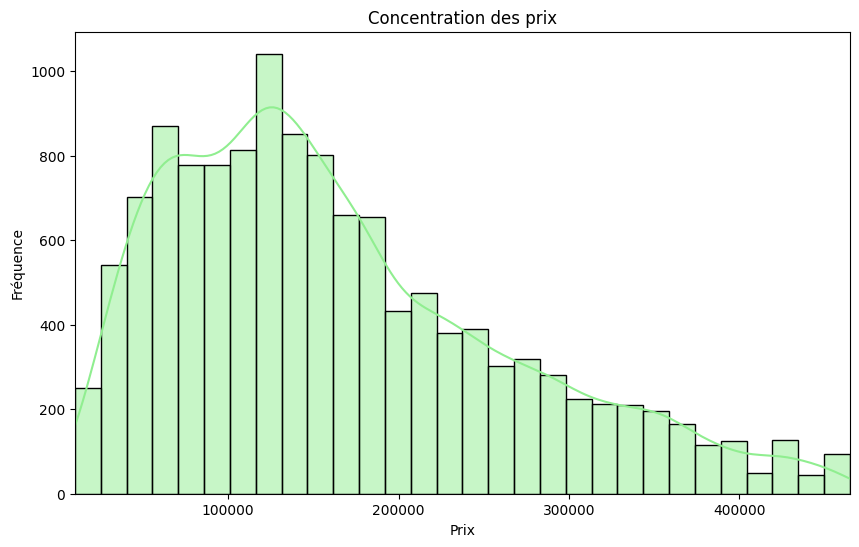

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv("AvitoVoitures_net.csv")

# Afficher les premières lignes pour vérification
print(data.head())




# Calculer les prix minimum et maximum
prix_min = data["Prix"].min()
prix_max = data["Prix"].max()
# Afficher les statistiques descriptives pour les prix
print("Résumé des statistiques descriptives :")
print(data["Prix"].describe())

# Histogramme de la distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Prix", bins=30, kde=True, color="lightgreen")
plt.title("Concentration des prix")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.ticklabel_format(style='plain', axis='x')

# Définir les limites de l'axe des abscisses
plt.xlim(prix_min, prix_max)

plt.show()




En se basant sur cette distribution, voici quelques points qui pourraient potentiellement indiquer des anomalies ou des aspects intéressants du marché à examiner de plus près :

Faible fréquence relative dans certaines zones de prix : Observez les creux dans la courbe de densité. Par exemple, il semble y avoir une relative rareté de voitures dans la fourchette de prix juste après le premier pic (autour de 80 000 - 100 000). Cela pourrait indiquer un manque d'offre dans ce segment spécifique ou une faible demande.

Concentrations inattendues à des prix élevés : Bien que la fréquence diminue généralement avec le prix, il pourrait y avoir des "bosses" ou des zones de concentration relative à des prix élevés qui méritent d'être investiguées. Par exemple, y a-t-il une concentration de voitures de luxe à un certain prix spécifique ?

Outliers potentiels (non directement visibles ici mais importants à considérer) : L'histogramme nous donne une idée de la distribution générale, mais il est important de se rappeler qu'il peut exister des prix extrêmement élevés qui sont masqués par l'échelle du graphique. Une analyse plus approfondie (par exemple, en utilisant des boxplots comme précédemment) pourrait révéler des outliers significatifs qui pourraient indiquer des erreurs de saisie, des collections rares ou des prix intentionnellement gonflés.

Écarts de prix importants entre les pics : La différence de prix entre le premier pic (bas) et le deuxième pic (moyen) pourrait refléter des segments de marché bien distincts avec des facteurs de valorisation différents (âge, caractéristiques, marque, etc.). Une analyse plus poussée pourrait examiner les types de voitures prédominants dans chaque pic.

La traîne longue à droite : Bien qu'attendue, l'étendue et la forme de cette traîne pourraient révéler la présence d'un marché de voitures de luxe ou de collection bien établi. Des pics ou des concentrations dans cette traîne pourraient être intéressants.



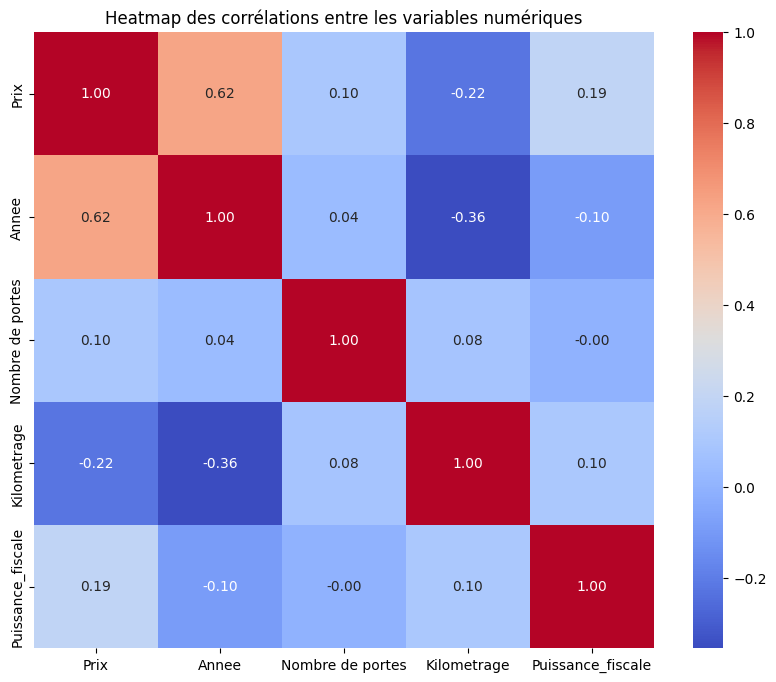

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv("AvitoVoitures_net.csv")

# Sélectionner uniquement les colonnes numériques
numerical_data = data.select_dtypes(include=['number'])

# Calculer la matrice de corrélations sur les colonnes numériques
correlation_matrix = numerical_data.corr()

# Créer une heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap des corrélations entre les variables numériques")
plt.show()



Corrélation entre le Prix et l'Année : Le coefficient de corrélation est de 0.62. C'est une corrélation positive modérée à forte. Cela suggère que les voitures plus récentes ont tendance à avoir des prix plus élevés.

Corrélation entre le Prix et le Nombre de portes : Le coefficient est de 0.10. C'est une corrélation positive très faible, indiquant qu'il n'y a pratiquement pas de relation linéaire significative entre le nombre de portes et le prix.

Corrélation entre le Prix et le Kilométrage : Le coefficient est de -0.22. C'est une corrélation négative faible. Cela suggère que plus le kilométrage est élevé, plus le prix a tendance à être bas, mais cette relation n'est pas très forte.

Corrélation entre le Prix et la Puissance fiscale : Le coefficient est de 0.19. C'est une corrélation positive faible, indiquant une légère tendance à ce que les voitures avec une puissance fiscale plus élevée aient un prix légèrement plus élevé.

Corrélation entre l'Année et le Kilométrage : Le coefficient est de -0.36. C'est une corrélation négative faible à modérée. Cela suggère que les voitures plus anciennes ont tendance à avoir un kilométrage plus élevé, ce qui est généralement attendu.

Corrélation entre le Nombre de portes et le Kilométrage : Le coefficient est de 0.08. C'est une corrélation positive très faible, indiquant une relation linéaire négligeable.

Corrélation entre le Nombre de portes et la Puissance fiscale : Le coefficient est de -0.00. Cela indique une absence quasi totale de corrélation linéaire entre ces deux variables.

Corrélation entre le Kilométrage et la Puissance fiscale : Le coefficient est de 0.10. C'est une corrélation positive très faible, suggérant une relation linéaire négligeable.

La variable qui semble avoir la relation linéaire positive la plus notable avec le prix est l'Année.
Le Kilométrage montre une faible relation linéaire négative avec le prix.
Le Nombre de portes et la Puissance fiscale ont des relations linéaires très faibles avec le prix.
Il existe une corrélation négative faible à modérée entre l'Année et le Kilométrage.

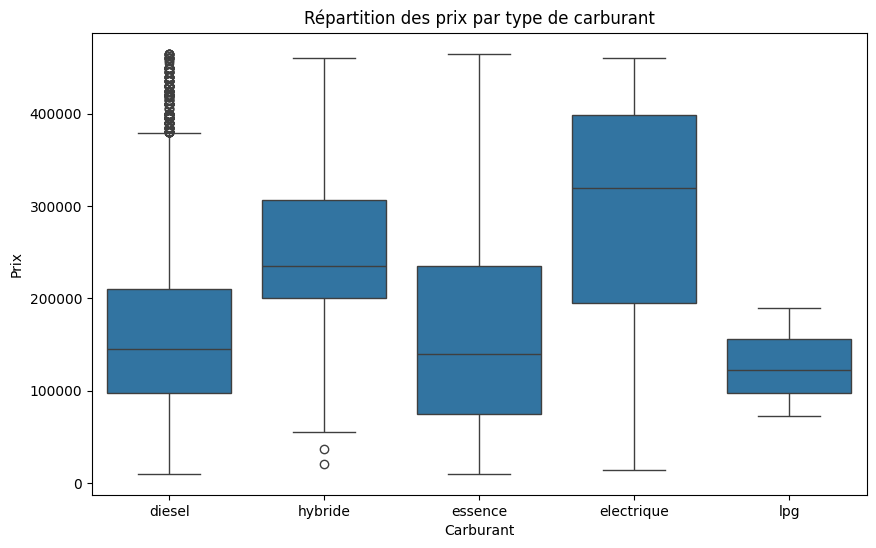

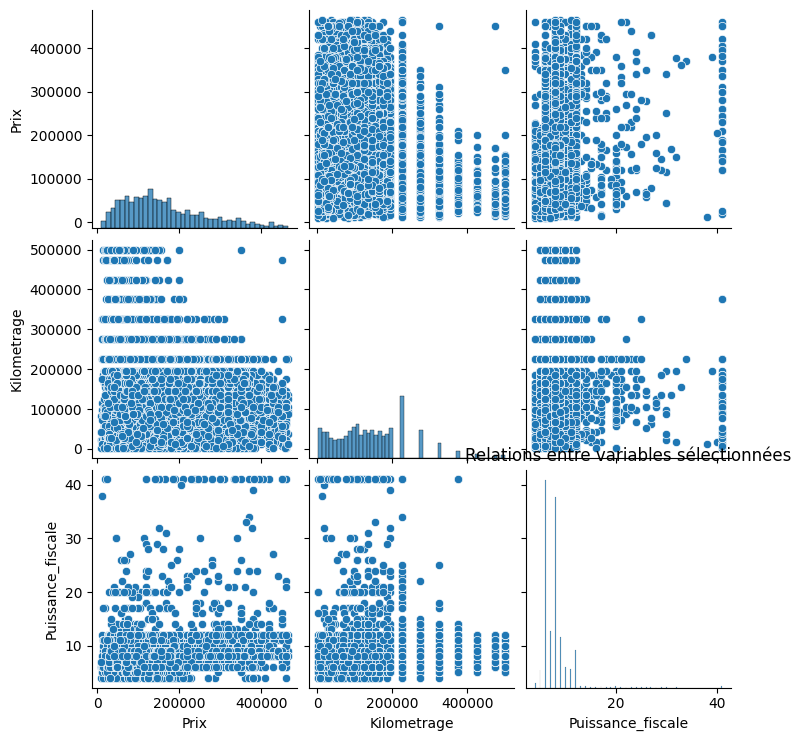

In [82]:
# Boxplot des prix par type de carburant
data = pd.read_csv("AvitoVoitures_net.csv")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Carburant", y="Prix")
plt.title("Répartition des prix par type de carburant")
plt.show()

# Pairplot pour explorer les relations entre variables
sns.pairplot(data, vars=["Prix", "Kilometrage", "Puissance_fiscale"])
plt.title("Relations entre variables sélectionnées")
plt.show()


Diesel :

La boîte s'étend approximativement de 100 000 à 210 000. Cela signifie que 50% des prix des voitures diesel se situent dans cette fourchette (l'intervalle interquartile, IQR).
La ligne au milieu de la boîte (la médiane) est autour de 150 000. C'est le prix médian des voitures diesel.
Les moustaches s'étendent vers le bas jusqu'à environ 0 et vers le haut jusqu'à environ 380 000. Elles représentent la dispersion des prix en dehors de l'IQR, généralement jusqu'à 1,5 fois l'IQR.
On observe de nombreux points au-dessus de la moustache supérieure. Ce sont des outliers (valeurs aberrantes), indiquant des voitures diesel avec des prix exceptionnellement élevés par rapport à la majorité.
Hybride :

La boîte est située dans une fourchette de prix plus élevée que le diesel, s'étendant approximativement de 200 000 à 300 000.
La médiane pour les hybrides est autour de 240 000, supérieure à celle du diesel.
Les moustaches sont plus courtes que celles du diesel, suggérant une dispersion des prix moins importante en dehors de l'IQR.
On observe quelques outliers avec des prix plus bas que la distribution principale.
Essence :

La distribution des prix pour l'essence semble plus large que celle du diesel et de l'hybride. La boîte s'étend approximativement de 70 000 à 230 000.
La médiane est autour de 130 000, la plus basse parmi les trois catégories principales (diesel, hybride, essence).
Les moustaches sont relativement longues, indiquant une plus grande variabilité des prix.
On observe quelques outliers à des prix très bas et quelques-uns à des prix élevés.
Electrique :

La boîte pour les voitures électriques se situe dans la fourchette de prix la plus élevée, allant approximativement de 200 000 à 400 000.
La médiane est très élevée, autour de 320 000.
La moustache inférieure est relativement courte, mais la moustache supérieure est assez longue, indiquant une dispersion vers des prix plus élevés.
On observe quelques outliers à des prix inférieurs à la distribution principale.
Lpg :

Le nombre de données pour le LPG semble plus faible, car la boîte est plus petite.
La distribution des prix est globalement plus basse, avec une boîte s'étendant approximativement de 90 000 à 160 000.
La médiane est autour de 120 000, la plus basse de toutes les catégories.
Les moustaches sont relativement courtes, suggérant une dispersion des prix limitée.
On observe quelques outliers à des prix plus élevés.

En résumé :

Les voitures électriques ont tendance à avoir les prix les plus élevés, suivies par les hybrides.
Les voitures essence et LPG ont des prix généralement plus bas, avec l'essence montrant une plus grande variabilité.
Les voitures diesel ont une distribution de prix intermédiaire, mais avec la présence de plusieurs outliers à des prix élevés.
La présence d'outliers dans toutes les catégories suggère qu'il existe des modèles spécifiques ou des conditions particulières qui influencent fortement le prix de certaines voitures.

Etape 3 : Étude des Tendances du Marché

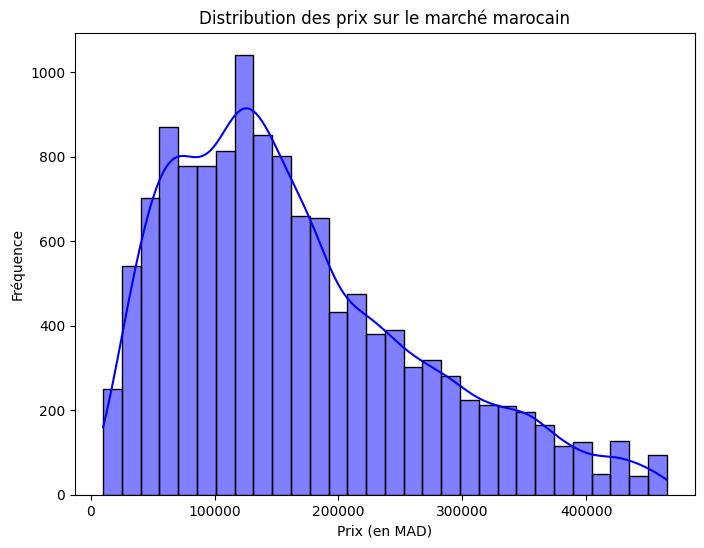

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramme des prix pour détecter des anomalies
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Prix", kde=True, color="blue", bins=30)
plt.title("Distribution des prix sur le marché marocain")
plt.xlabel("Prix (en MAD)")
plt.ylabel("Fréquence")
plt.show()


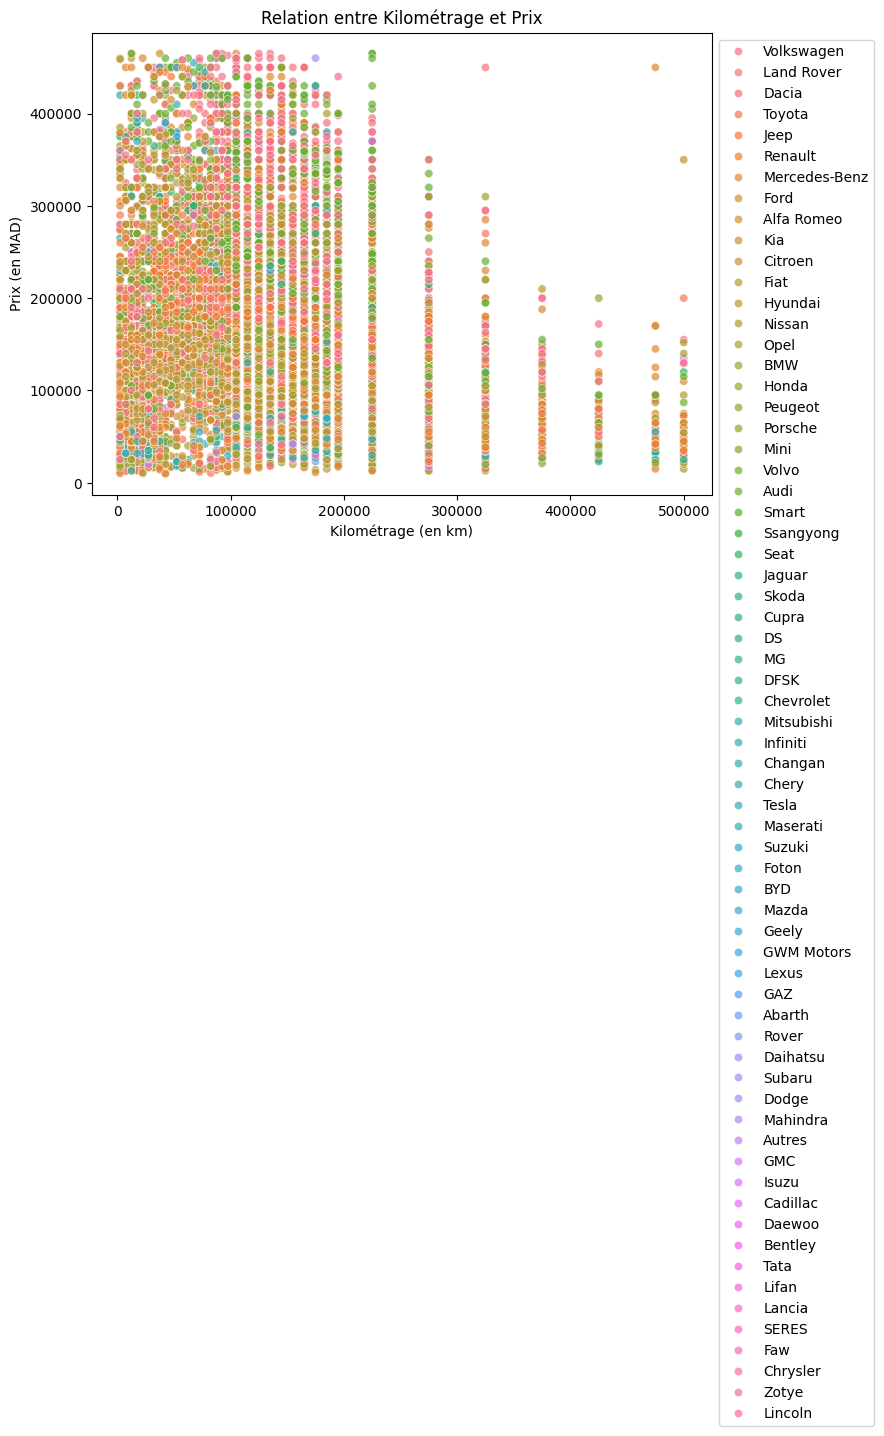

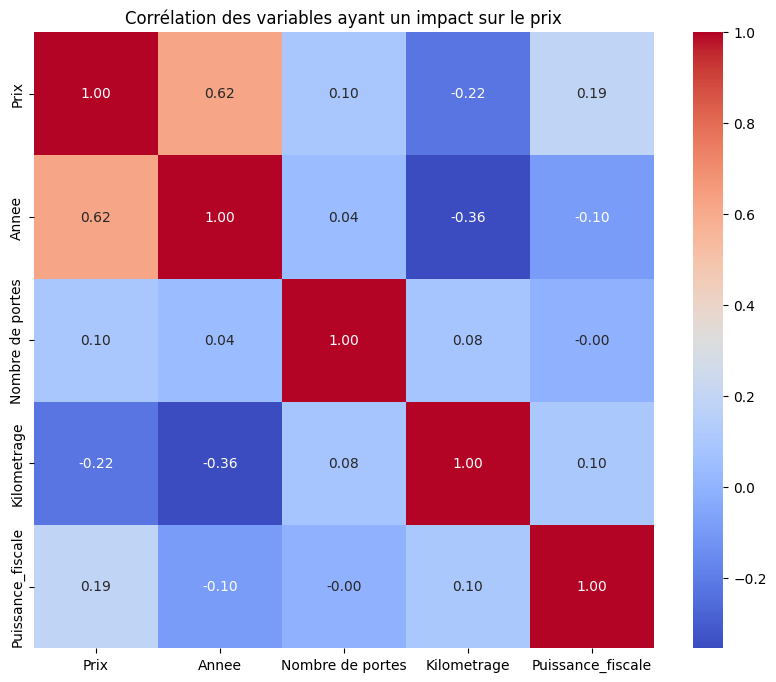

In [84]:
# Visualisation de la corrélation entre Kilométrage et Prix
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Kilometrage", y="Prix", hue="Marque", alpha=0.7)
plt.title("Relation entre Kilométrage et Prix")
plt.xlabel("Kilométrage (en km)")
plt.ylabel("Prix (en MAD)")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Heatmap des corrélations entre les facteurs numériques
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation des variables ayant un impact sur le prix")
plt.show()


Prix moyen par marque :
Marque
Tesla      404272.727273
Bentley    370000.000000
Lincoln    350000.000000
Cupra      346666.666667
Lexus      331916.666667
               ...      
Lifan       37000.000000
BYD         33000.000000
Daewoo      29777.777778
Faw         29000.000000
Rover       27000.000000
Name: Prix, Length: 66, dtype: float64


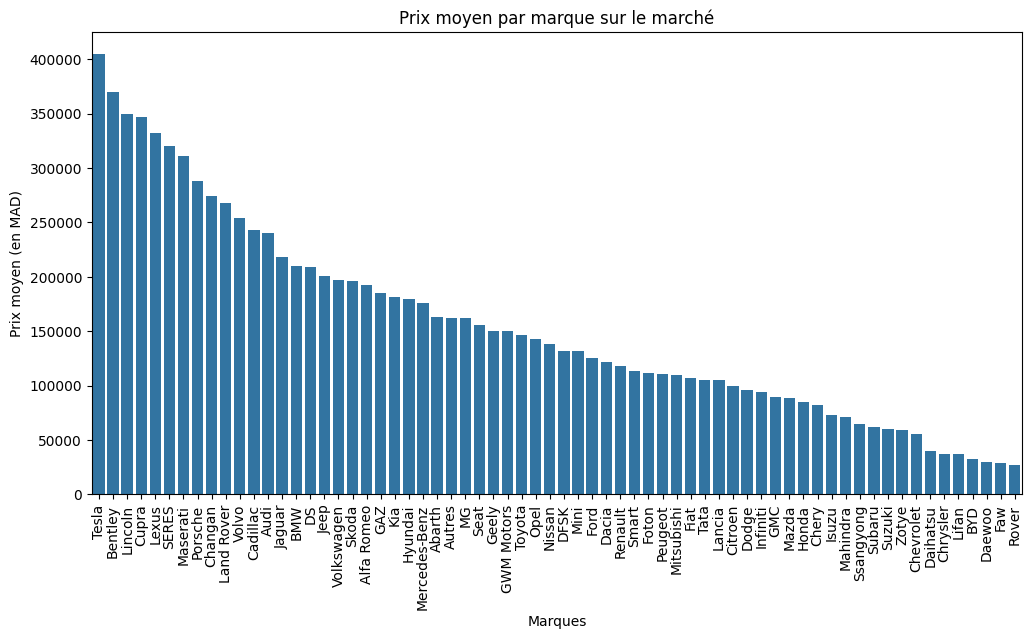

In [85]:
# Prix moyen par marque
average_price_per_brand = data.groupby("Marque")["Prix"].mean().sort_values(ascending=False)
print("Prix moyen par marque :")
print(average_price_per_brand)

# Visualisation des prix moyens par marque
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_per_brand.index, y=average_price_per_brand.values)
plt.title("Prix moyen par marque sur le marché")
plt.xlabel("Marques")
plt.ylabel("Prix moyen (en MAD)")
plt.xticks(rotation=90)
plt.show()


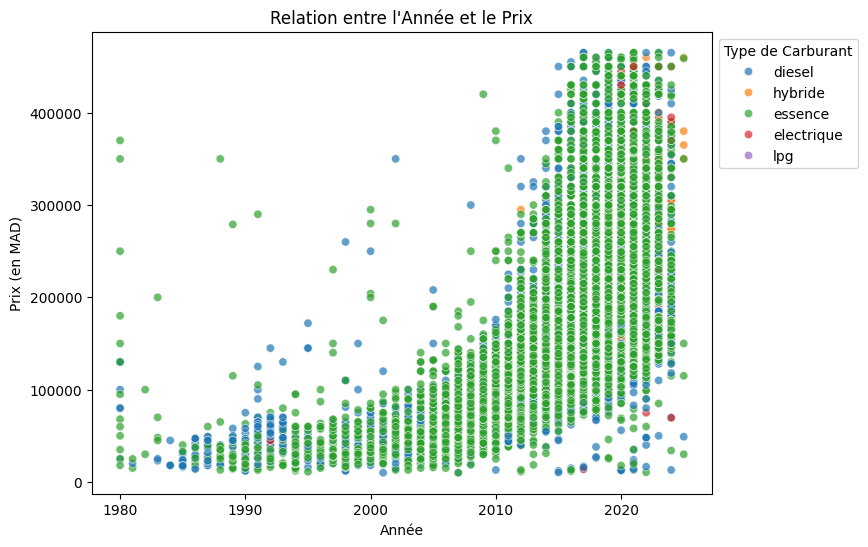

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un scatterplot pour la relation entre Année et Prix
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Annee", y="Prix", hue="Carburant", alpha=0.7)
plt.title("Relation entre l'Année et le Prix")
plt.xlabel("Année")
plt.ylabel("Prix (en MAD)")
plt.legend(title="Type de Carburant", bbox_to_anchor=(1, 1))
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_38792\3358072106.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Etat", y="Prix", palette="Set2")


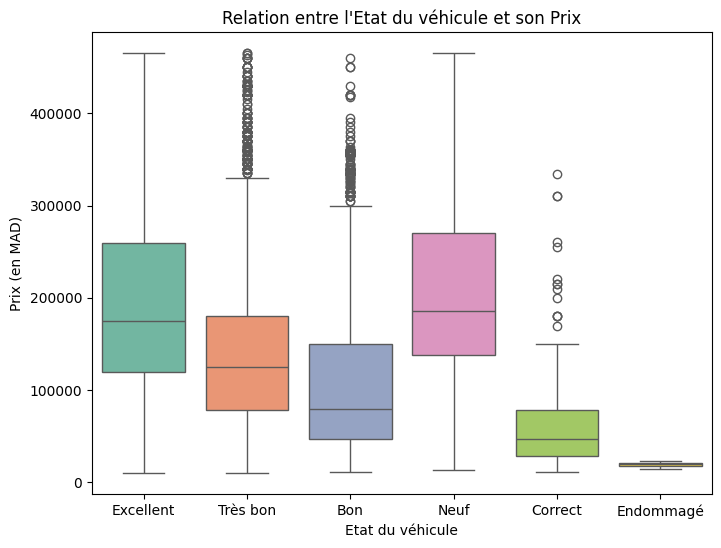

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un boxplot pour visualiser la répartition des prix en fonction de l'état du véhicule
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Etat", y="Prix", palette="Set2")
plt.title("Relation entre l'Etat du véhicule et son Prix")
plt.xlabel("Etat du véhicule")
plt.ylabel("Prix (en MAD)")
plt.show()


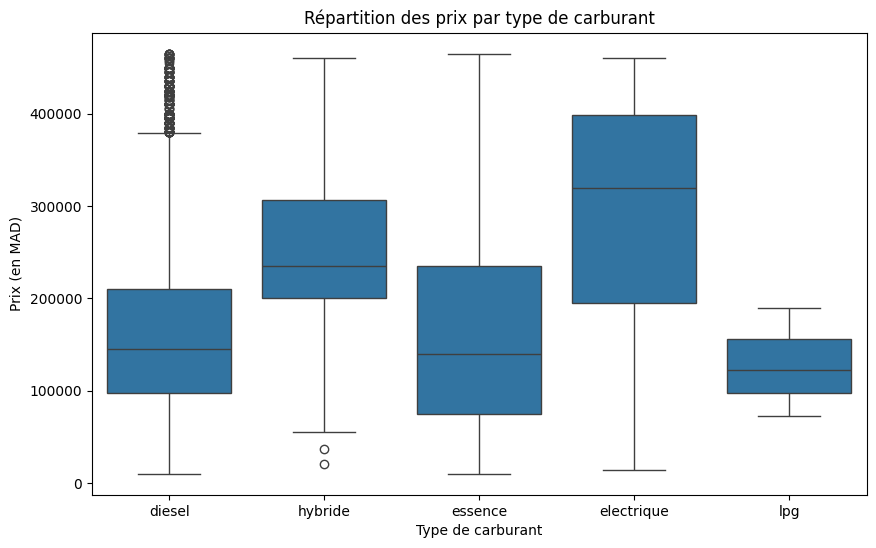

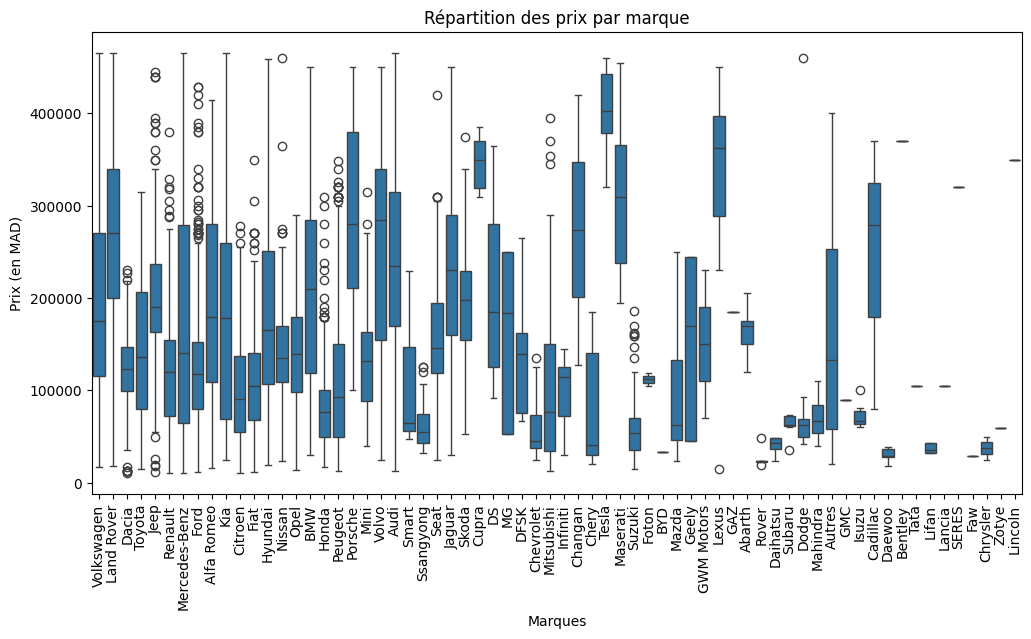

In [89]:
# Boxplot des prix par type de carburant
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Carburant", y="Prix")
plt.title("Répartition des prix par type de carburant")
plt.xlabel("Type de carburant")
plt.ylabel("Prix (en MAD)")
plt.show()

# Boxplot des prix par marque
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Marque", y="Prix")
plt.title("Répartition des prix par marque")
plt.xlabel("Marques")
plt.ylabel("Prix (en MAD)")
plt.xticks(rotation=90)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_38792\3847196061.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Première main", y="Prix", palette="Set2")


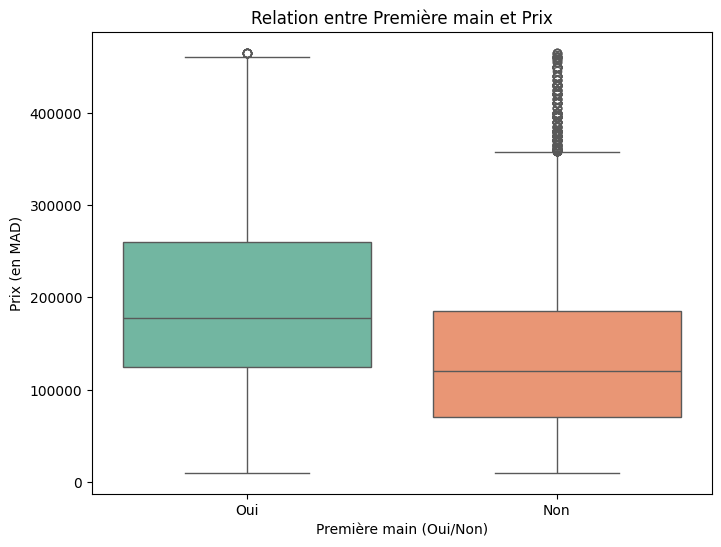

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv("AvitoVoitures_net.csv")

# Créer un boxplot pour visualiser la relation
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Première main", y="Prix", palette="Set2")
plt.title("Relation entre Première main et Prix")
plt.xlabel("Première main (Oui/Non)")
plt.ylabel("Prix (en MAD)")
plt.show()


Les véhicules Première main (Oui) devraient, en général, avoir des prix plus élevés car ils sont souvent mieux entretenus.

Les véhicules Première main (Non) peuvent afficher des prix plus bas, en raison de l’usure accumulée par plusieurs propriétaires.

In [91]:
# Afficher les valeurs uniques de la colonne "Nombre de portes"
unique_values = data["Nombre de portes"].unique()
print("Valeurs uniques dans la colonne 'Nombre de portes' :")
print(unique_values)

Valeurs uniques dans la colonne 'Nombre de portes' :
[5 3]


C:\Users\DELL\AppData\Local\Temp\ipykernel_38792\2688054896.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Nombre de portes", y="Prix", palette="Set3")


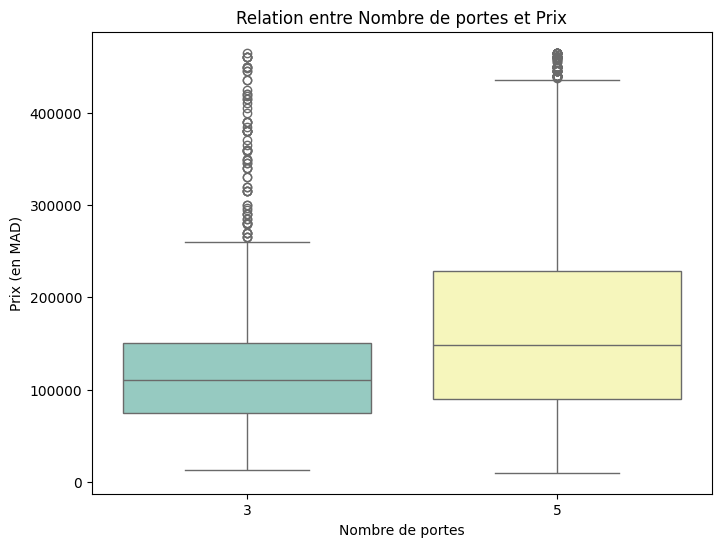

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un boxplot pour visualiser la relation entre Nombre de portes et Prix
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Nombre de portes", y="Prix", palette="Set3")
plt.title("Relation entre Nombre de portes et Prix")
plt.xlabel("Nombre de portes")
plt.ylabel("Prix (en MAD)")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_38792\53224309.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Auto_manuel", y="Prix", palette="Set1")


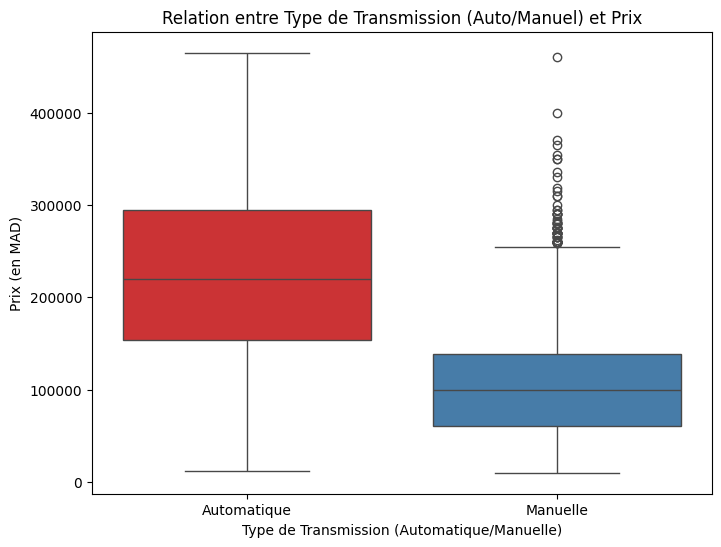

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un boxplot pour visualiser la relation entre Auto/Manuel et Prix
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Auto_manuel", y="Prix", palette="Set1")
plt.title("Relation entre Type de Transmission (Auto/Manuel) et Prix")
plt.xlabel("Type de Transmission (Automatique/Manuelle)")
plt.ylabel("Prix (en MAD)")
plt.show()


# modélisation

In [15]:
y_test

11933    0.252747
11844    0.769231
8        0.208791
839      0.395604
2484     0.503297
           ...   
11102    0.197802
2464     0.268132
5886     0.108791
4653     0.967033
1805     0.208791
Name: Prix, Length: 2575, dtype: float64

In [23]:
y_pred

array([0.2865485 , 0.59595815, 0.27948356, ..., 0.20578197, 0.66703042,
       0.48068026], shape=(2575,))

In [29]:
# Inverser la normalisation des valeurs de test et prédictions
y_test_original = scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Recalculer les métriques avec les valeurs dénormalisées
mae_real = mean_absolute_error(y_test_original, y_pred_original)
mse_real = mean_squared_error(y_test_original, y_pred_original)
rmse_real = np.sqrt(mse_real)
r2_real = r2_score(y_test_original, y_pred_original)

# Afficher les nouvelles métriques sur les prix réels
print("MAE (Prix réel) :", mae_real)
print("MSE (Prix réel) :", mse_real)
print("RMSE (Prix réel) :", rmse_real)
print("R² (Prix réel) :", r2_real)


MAE (Prix réel) : 0.07046021299227587
MSE (Prix réel) : 0.011085145998937078
RMSE (Prix réel) : 0.10528601995961799
R² (Prix réel) : 0.7803426816038295


MAE et RMSE donnent une idée des erreurs en unités réelles (euros).

MSE est utile pour voir l’impact des grandes erreurs, mais son interprétation est plus abstraite.

R² indique si ton modèle est globalement bon, mais il ne donne pas d’information sur les erreurs individuelles.

In [32]:
# Vérifier que le scaler est bien défini sur la colonne "Prix"
scaler = MinMaxScaler()
scaler.fit(data[["Prix"]])  # Assure-toi que "data" contient la colonne originale avant normalisation

# Inverser la normalisation de y_test
y_test_original = scaler.inverse_transform(y_test.values.reshape(-1, 1))

# Afficher quelques valeurs pour vérification
print("Valeurs normalisées de y_test :", y_test[:10])  # Vérifier si elles sont entre [0,1]
print("Valeurs réelles de y_test (dénormalisées) :", y_test_original[:10])  # Vérifier qu'elles sont bien en euros


Valeurs normalisées de y_test : 11933    0.252747
11844    0.769231
8        0.208791
839      0.395604
2484     0.503297
12874    0.098901
5372     0.230769
8408     0.098901
3860     1.000000
10251    0.347253
Name: Prix, dtype: float64
Valeurs réelles de y_test (dénormalisées) : [[0.25274725]
 [0.76923077]
 [0.20879121]
 [0.3956044 ]
 [0.5032967 ]
 [0.0989011 ]
 [0.23076923]
 [0.0989011 ]
 [1.        ]
 [0.34725275]]


# dénormalisation 


📊 Classement des caractéristiques les plus influentes :
                     Feature  Importance
0                      Annee    0.339363
5       Auto_manuel_Manuelle    0.182149
4    Auto_manuel_Automatique    0.161791
3          Puissance_fiscale    0.063229
2                Kilometrage    0.029504
..                       ...         ...
65               Marque_Seat    0.000409
413           Module_Mustang    0.000409
265          Module_Defender    0.000409
377      Module_Land Cruiser    0.000406
592               Module_i10    0.000405

[100 rows x 2 columns]


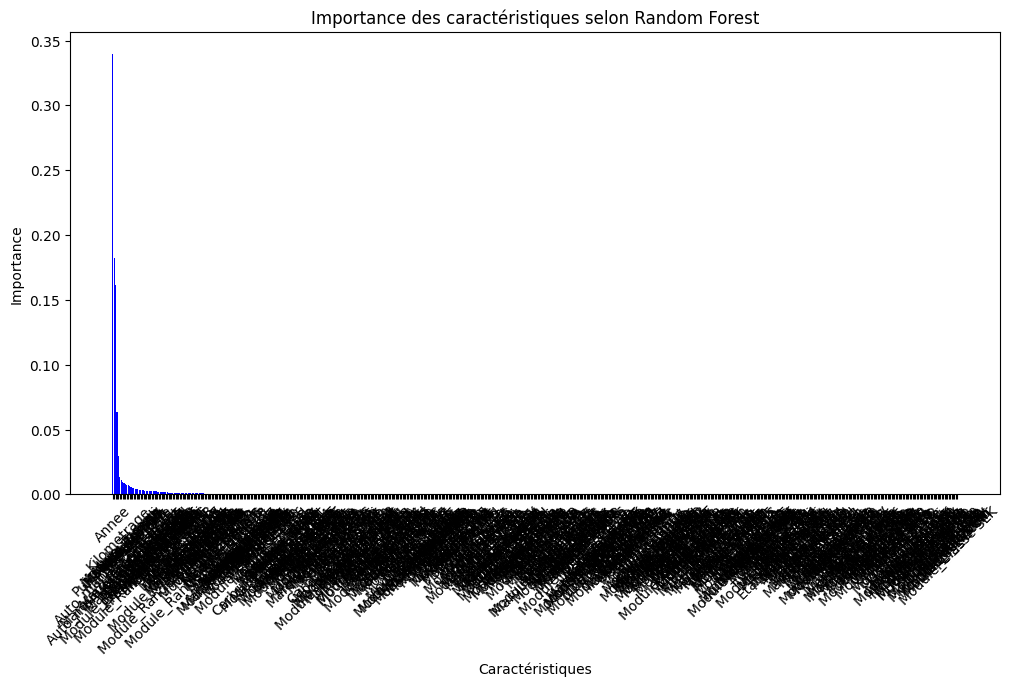

In [36]:
# 1️⃣ Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 2️⃣ Chargement des données
data = pd.read_csv("AvitoVoitures_normalise.csv")  

# 3️⃣ Définition des caractéristiques et de la variable cible
y = data["Prix"]  # Variable à prédire
X = data.drop(columns=["Prix"])  # Suppression de la colonne cible

# 4️⃣ Division des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Entraînement du modèle Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# 6️⃣ Extraction de l’importance des caractéristiques
importances = pd.DataFrame({"Feature": X.columns, "Importance": model_rf.feature_importances_})
importances = importances.sort_values(by="Importance", ascending=False)

# 7️⃣ Affichage des 10 caractéristiques les plus importantes
print("\n📊 Classement des caractéristiques les plus influentes :")
print(importances.head(100))

# 8️⃣ Visualisation des importances des caractéristiques
plt.figure(figsize=(12, 6))
plt.bar(importances["Feature"], importances["Importance"], color="blue")
plt.xticks(rotation=45)
plt.xlabel("Caractéristiques")
plt.ylabel("Importance")
plt.title("Importance des caractéristiques selon Random Forest")
plt.show()

# 9️⃣ Sélection des meilleures caractéristiques (ex: les 5 plus importantes)
top_features = importances["Feature"].head(5).tolist()
X_selected = X[top_features]  # Garde uniquement les meilleures colonnes
